In [1]:
#importing libraries
import numpy as np
import pandas as pd
import missingno as msno

In [2]:
#read train and test data files
loan_train = pd.read_csv('C:/Users/Ishwari Kadam/Desktop/Projects/Python/loan-train.csv')
loan_test = pd.read_csv('C:/Users/Ishwari Kadam/Desktop/Projects/Python/loan-test.csv')

In [3]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#print("Rows: ", len(loan_train))
#print("Columns: ", len(loan_train.columns))
print("Train DF shape: ", loan_train.shape)

Train DF shape:  (614, 13)


In [6]:
loan_train_cols = loan_train.columns

In [7]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
#EDA

def explore_objects(df, feature_name):
    if df[feature_name].dtype == 'object':
        print(df[feature_name].value_counts())

explore_objects(loan_train, 'Gender')

Gender
Male      489
Female    112
Name: count, dtype: int64


In [10]:
#if there are many features to be checked
for featureName in loan_train_cols:
    if loan_train[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" values are: ')
        explore_objects(loan_train, str(featureName))


"Loan_ID's" values are: 
Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

"Gender's" values are: 
Gender
Male      489
Female    112
Name: count, dtype: int64

"Married's" values are: 
Married
Yes    398
No     213
Name: count, dtype: int64

"Dependents's" values are: 
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

"Education's" values are: 
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

"Self_Employed's" values are: 
Self_Employed
No     500
Yes     82
Name: count, dtype: int64

"Property_Area's" values are: 
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

"Loan_Status's" values are: 
Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [11]:
loan_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

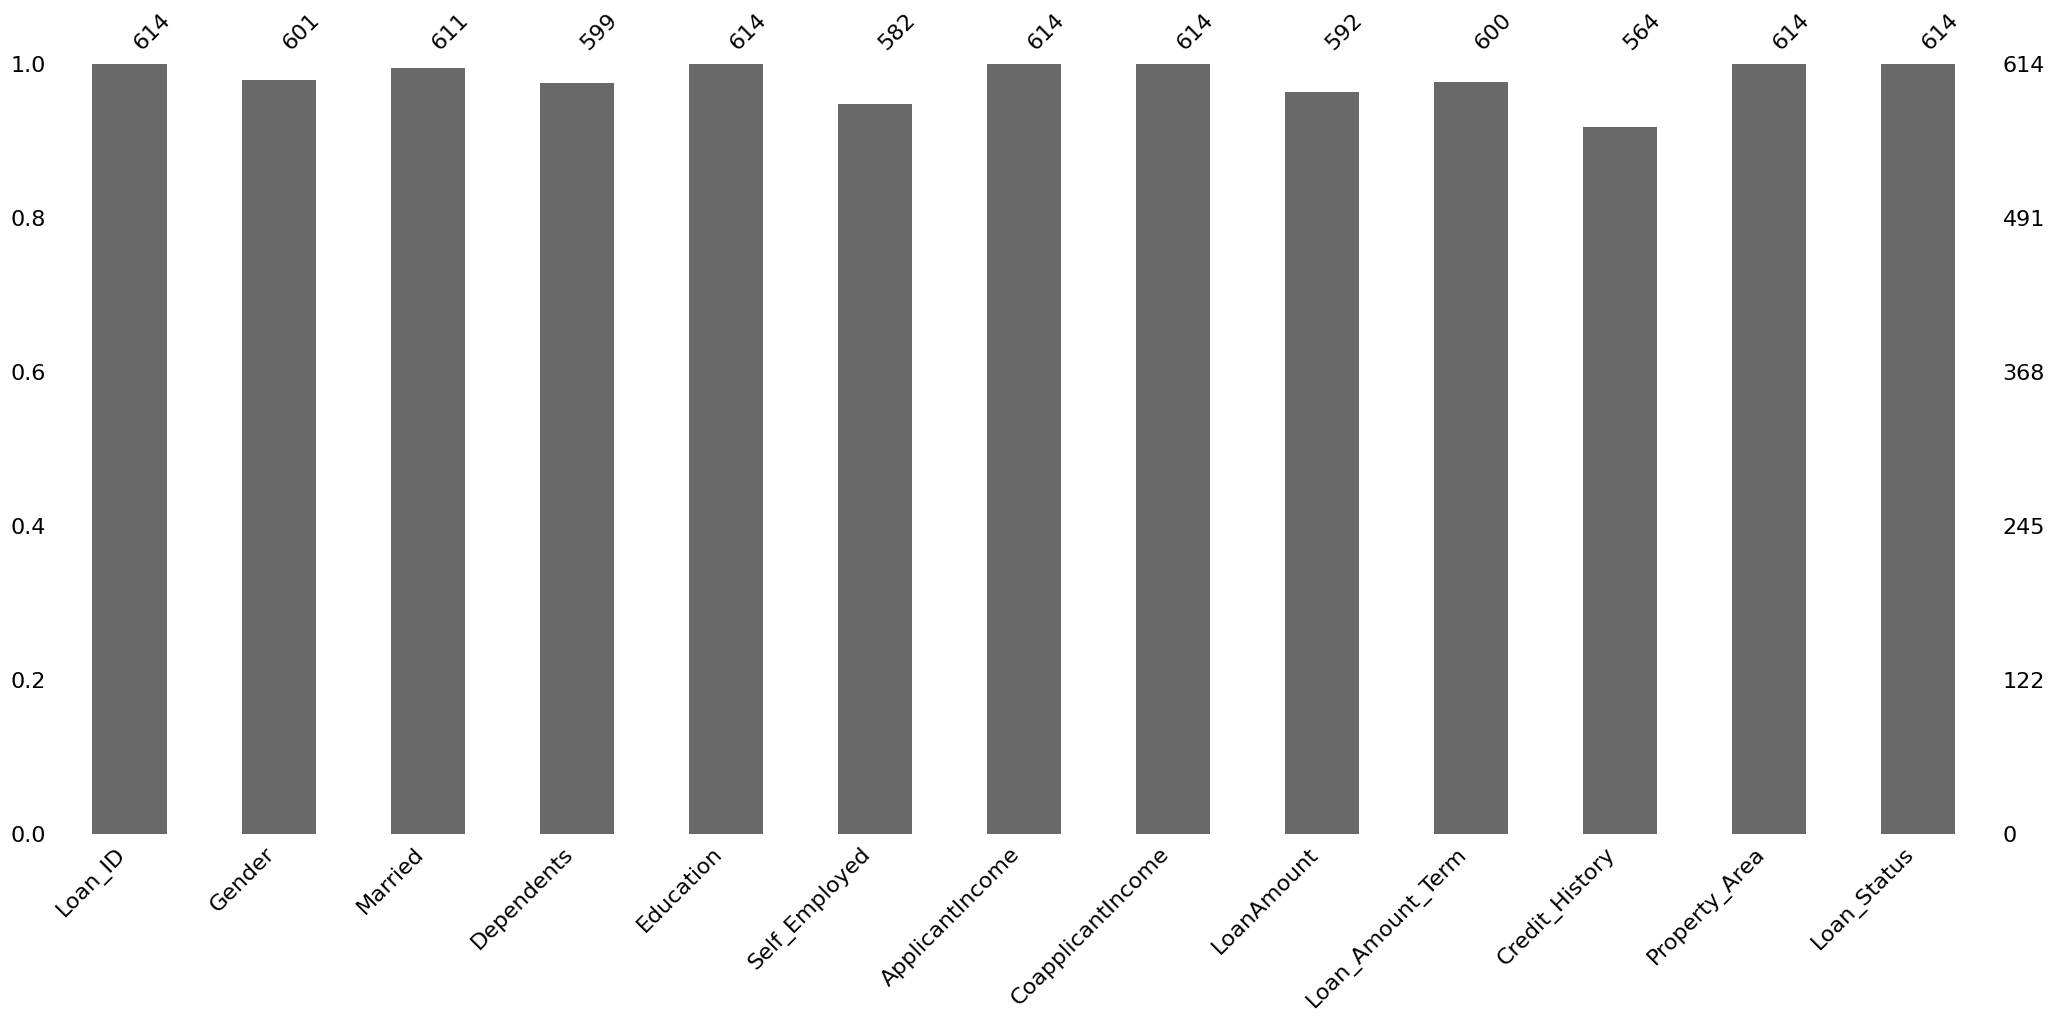

In [12]:
msno.bar(loan_train)

In [13]:
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode(), inplace=True) # Mode
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode(), inplace=True) # Mode


loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(), inplace=True) # Mean
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].mean(), inplace=True) # Mean

In [15]:
loan_train.Loan_Status = loan_train.Loan_Status.replace({"Y": 1, "N" : 0})
# loan_test.Loan_Status = loan_test.Loan_Status.replace({"Y": 1, "N" : 0}) 

loan_train.Gender = loan_train.Gender.replace({"Male": 1, "Female" : 0})
loan_test.Gender = loan_test.Gender.replace({"Male": 1, "Female" : 0})

loan_train.Married = loan_train.Married.replace({"Yes": 1, "No" : 0})
loan_test.Married = loan_test.Married.replace({"Yes": 1, "No" : 0})

loan_train.Self_Employed = loan_train.Self_Employed.replace({"Yes": 1, "No" : 0})
loan_test.Self_Employed = loan_test.Self_Employed.replace({"Yes": 1, "No" : 0})

In [16]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,Graduate,0.0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,1.0,1.0,1,Graduate,0.0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,1.0,1.0,0,Graduate,1.0,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,1.0,1.0,0,Not Graduate,0.0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,1.0,0.0,0,Graduate,0.0,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,Graduate,0.0,2900,0.0,71.000000,360.0,1.0,Rural,1
610,LP002979,1.0,1.0,3+,Graduate,0.0,4106,0.0,40.000000,180.0,1.0,Rural,1
611,LP002983,1.0,1.0,1,Graduate,0.0,8072,240.0,253.000000,360.0,1.0,Urban,1
612,LP002984,1.0,1.0,2,Graduate,0.0,7583,0.0,187.000000,360.0,1.0,Urban,1


In [17]:
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)

loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)

loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0], inplace=True)

loan_train['Credit_History'].fillna(loan_train['Credit_History'].mean(), inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mean(), inplace=True)

In [18]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [19]:
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    loan_train[col] = le.fit_transform(loan_train[col])
    loan_test[col] = le.fit_transform(loan_test[col])

In [20]:
loan_train['Self_Employed'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_test['Self_Employed'].fillna(loan_test['Gender'].mode()[0], inplace=True)

loan_train['Loan_Amount_Term'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_test['Loan_Amount_Term'].fillna(loan_test['Dependents'].mode()[0], inplace=True)

In [21]:
print(loan_train.isna().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [ ]:
#visualization

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loan_train.plot(figsize=(20, 10))

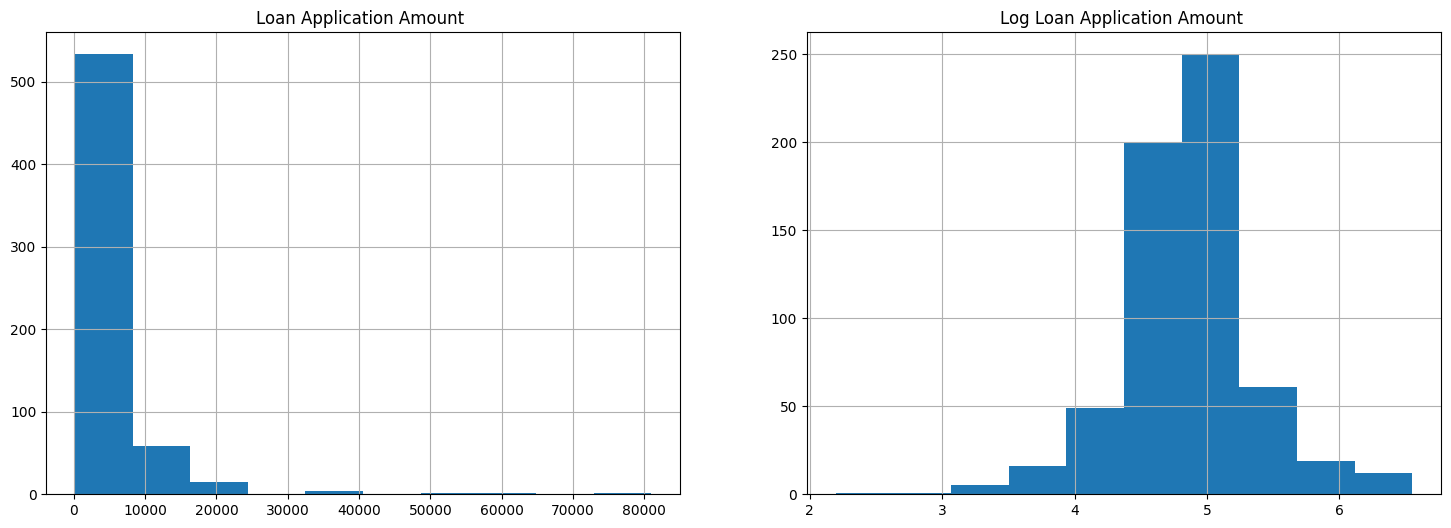

In [23]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)

loan_train['ApplicantIncome'].hist(bins=10)
plt.title("Loan Application Amount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(loan_train['LoanAmount']))
plt.title("Log Loan Application Amount ")

plt.show()


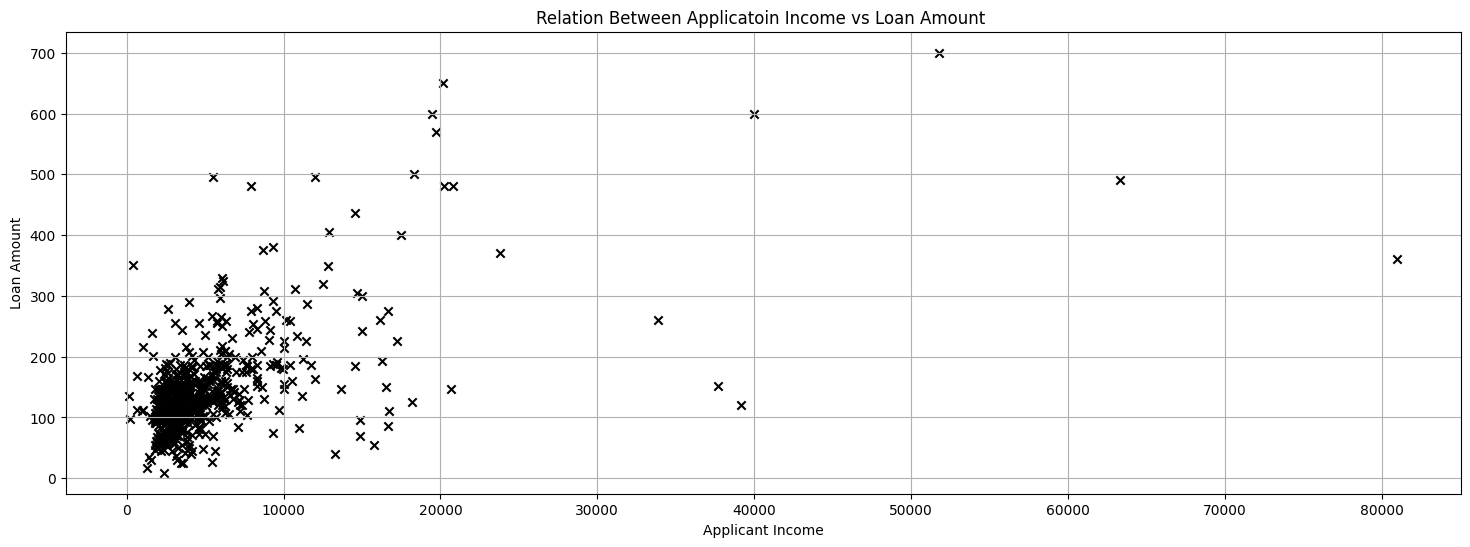

In [24]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(loan_train['ApplicantIncome'] , loan_train['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

In [25]:
loan_train_no_id = loan_train.drop(columns=['Loan_ID'])

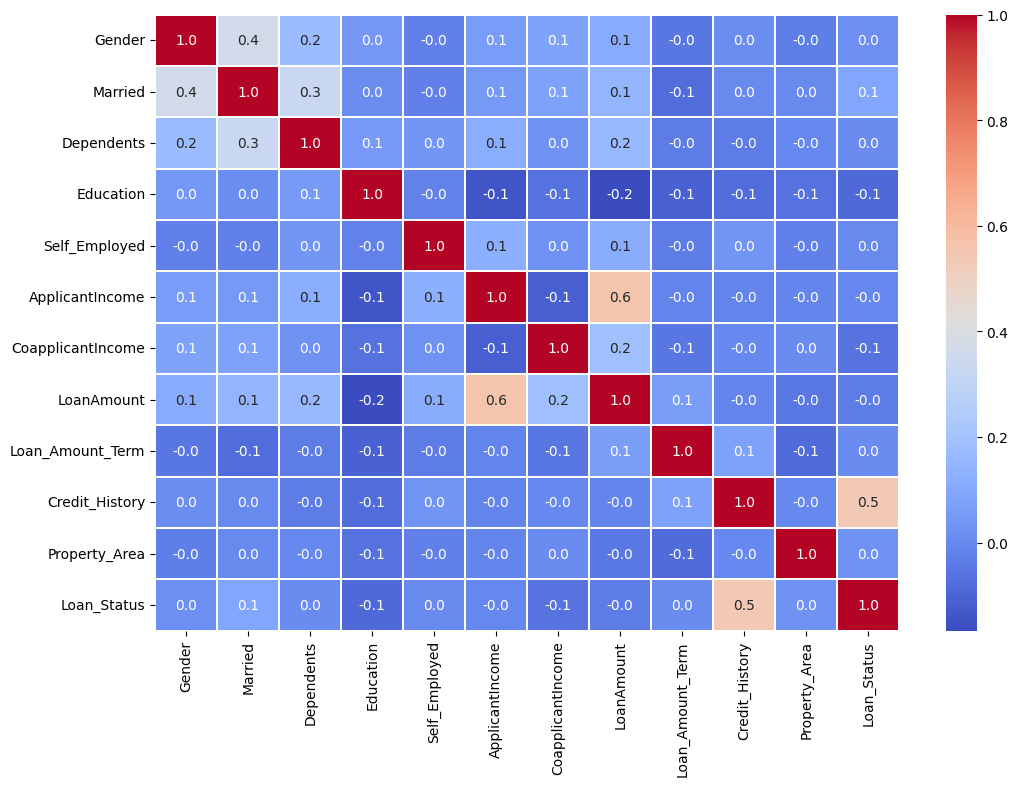

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(loan_train_no_id.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [27]:
#logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [28]:
logistic_model = LogisticRegression()

In [29]:
#train model
#checking on particular features

train_features = ['Credit_History', 'ApplicantIncome', 'Married']

In [30]:
#x_train = loan_train[train_features].values
x_train = loan_train.drop(columns=['Loan_ID', 'Loan_Status']).values
y_train = loan_train['Loan_Status'].values

In [31]:
x_test = loan_test.drop(columns=['Loan_ID']).values

In [32]:
logistic_model.fit(x_train, y_train)

C:\Users\Ishwari Kadam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
#predict model

predicted = logistic_model.predict(x_test)

In [34]:
# Convert predicted values to a DataFrame
predicted_df = pd.DataFrame(predicted, columns=['Predicted'])

# Combine test data and predicted values
predicted_test = pd.concat([pd.DataFrame(x_test), predicted_df], axis=1)


In [35]:
predicted_test

,0,1,2,3,4,5,6,7,8,9,10,Predicted
0,1.0,1.0,0.0,0.0,0.0,5720.0,0.0,110.0,360.0,1.000000,2.0,1
1,1.0,1.0,1.0,0.0,0.0,3076.0,1500.0,126.0,360.0,1.000000,2.0,1
2,1.0,1.0,2.0,0.0,0.0,5000.0,1800.0,208.0,360.0,1.000000,2.0,1
3,1.0,1.0,2.0,0.0,0.0,2340.0,2546.0,100.0,360.0,0.825444,2.0,1
4,1.0,0.0,0.0,1.0,0.0,3276.0,0.0,78.0,360.0,1.000000,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,1.0,3.0,1.0,1.0,4009.0,1777.0,113.0,360.0,1.000000,2.0,1
363,1.0,1.0,0.0,0.0,0.0,4158.0,709.0,115.0,360.0,1.000000,2.0,1
364,1.0,0.0,0.0,0.0,0.0,3250.0,1993.0,126.0,360.0,0.825444,1.0,1
365,1.0,1.0,0.0,0.0,0.0,5000.0,2393.0,158.0,360.0,1.000000,0.0,1


In [36]:
print('Coefficient of model :', logistic_model.coef_)
print('Intercept of model',logistic_model.intercept_)

Coefficient of model : [[ 1.24419847e-01  5.72315392e-01 -1.86370733e-01 -4.72269808e-01
   6.53031594e-02  2.12908492e-06 -6.27856484e-05 -2.22765996e-03
  -4.49888012e-03  2.84212263e+00  8.56747459e-02]]
Intercept of model [0.14020649]


In [37]:
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8078175895765473
accuracy_score percent : 80.78
